In [2]:
import tensorflow as tf

# Load the data
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/Users/sathvikchowdaryveerapaneni/Desktop/GitHub/Project/IOS_APP/FER/Data/train',
    validation_split=0.2,
    subset='training',
    seed=123,
    labels='inferred',
    label_mode='categorical',
    image_size=(48, 48),
    color_mode='grayscale',
    batch_size=32
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/Users/sathvikchowdaryveerapaneni/Desktop/GitHub/Project/IOS_APP/FER/Data/train',
    validation_split=0.2,
    subset='validation',
    seed=123,
    labels='inferred',
    label_mode='categorical',
    image_size=(48, 48),
    color_mode='grayscale',
    batch_size=32
)

# Normalize the data
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
val_data = val_data.map(lambda x, y: (normalization_layer(x), y))


Found 28709 files belonging to 7 classes.
Using 22968 files for training.
Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Found 28709 files belonging to 7 classes.
Using 5741 files for validation.


In [4]:
# CNN Architecture 
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 4096)             

In [5]:

# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=40
)


Epoch 1/40


2023-05-31 19:41:45.662353: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


718/718 [==============================] - 18s 22ms/step - loss: 1.6561 - accuracy: 0.3440 - val_loss: 1.5328 - val_accuracy: 0.4024
Epoch 2/40
718/718 [==============================] - 15s 20ms/step - loss: 1.4511 - accuracy: 0.4410 - val_loss: 1.3842 - val_accuracy: 0.4646
Epoch 3/40
718/718 [==============================] - 15s 20ms/step - loss: 1.3257 - accuracy: 0.4930 - val_loss: 1.3474 - val_accuracy: 0.4855
Epoch 4/40
718/718 [==============================] - 15s 20ms/step - loss: 1.2311 - accuracy: 0.5304 - val_loss: 1.3321 - val_accuracy: 0.4851
Epoch 5/40
718/718 [==============================] - 14s 20ms/step - loss: 1.1538 - accuracy: 0.5628 - val_loss: 1.2951 - val_accuracy: 0.5079
Epoch 6/40
718/718 [==============================] - 15s 20ms/step - loss: 1.0834 - accuracy: 0.5899 - val_loss: 1.3139 - val_accuracy: 0.5191
Epoch 7/40
718/718 [==============================] - 15s 20ms/step - loss: 1.0200 - accuracy: 0.6166 - val_loss: 1.3419 - val_accuracy: 0.5090
Epo

In [6]:
# Save only the model'
model.save('CNN.h5')


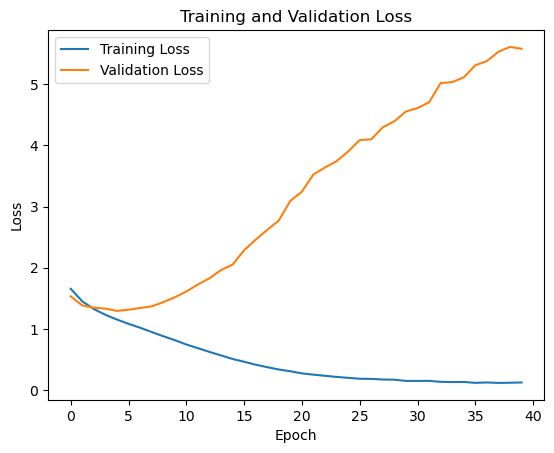

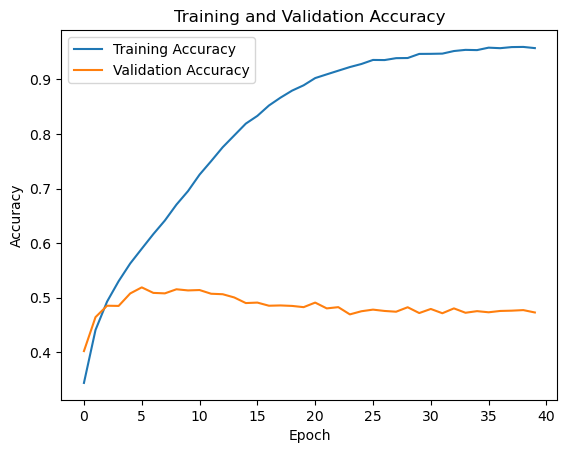

In [7]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [8]:
# Load the saved model
model = tf.keras.models.load_model('CNN.h5')
print(model)

In [9]:
def check_overfitting_underfitting(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    min_val_loss_epoch = val_loss.index(min(val_loss)) + 1
    if train_loss[min_val_loss_epoch - 1] < min(val_loss):
        print('The model may be overfitting')
    elif max(train_loss) > min(val_loss):
        print('The model may be underfitting')
    else:
        print('The model is performing well')


In [10]:
check_overfitting_underfitting(history)

The model may be overfitting


In [14]:
import pandas as pd
import tensorflow as tf


# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Class', 'Image Name', 'Predicted Class'])

# Make predictions on 5 random images from each subfolder
for class_name in class_names:
    class_folder = os.path.join(test_folder, class_name)
    image_names = os.listdir(class_folder)
    image_names = random.sample(image_names, 3)
    for image_name in image_names:
        # Load and preprocess the image
        image_path = os.path.join(class_folder, image_name)
        img = image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.

        # Make a prediction on the image
        print(model.name)
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions[0])
        predicted_class_name = class_names[predicted_class]
        
        # Add the result to the DataFrame
        results = results.append({
            'Class': class_name,
            'Image Name': image_name,
            'Predicted Class': predicted_class_name
        }, ignore_index=True)


NameError: name 'os' is not defined